# Student Analysis

An analysis of IT and SIB student registrant

### Goals

- make a prediction using multiple linear regression (MLR) on these data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/DATA_AWAHAB_FINAL.xlsx', sheet_name='budgets')
df

,Tahun,SPP,Heregistrasi,DPP,OSPEK,UTS&UAS
0,2023,1800000,300000,2000000,500000,200000
1,2022,1600000,150000,1800000,400000,150000
2,2021,1400000,150000,1600000,400000,150000
3,2020,1400000,150000,1600000,400000,150000
4,2019,1350000,100000,1550000,300000,150000
5,2018,1200000,100000,1400000,200000,150000
6,2017,1200000,100000,1400000,200000,150000
7,2016,1200000,100000,1400000,200000,150000
8,2015,1200000,100000,1400000,200000,150000
9,2014,1200000,100000,1400000,200000,150000


In [3]:
df.rename(columns={'Tahun': 'Year'}, inplace=True)
df.set_index('Year', inplace=True)
df

,SPP,Heregistrasi,DPP,OSPEK,UTS&UAS
Year,,,,,
2023,1800000,300000,2000000,500000,200000
2022,1600000,150000,1800000,400000,150000
2021,1400000,150000,1600000,400000,150000
2020,1400000,150000,1600000,400000,150000
2019,1350000,100000,1550000,300000,150000
2018,1200000,100000,1400000,200000,150000
2017,1200000,100000,1400000,200000,150000
2016,1200000,100000,1400000,200000,150000
2015,1200000,100000,1400000,200000,150000


In [8]:
df = pd.read_excel('data/DATA_AWAHAB_FINAL.xlsx', sheet_name='data_import')
df

,Tahun,P_SMA_TI,P_SMK_TI,P_MA_TI,Unnamed: 4,P_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,IU_TI,Unnamed: 10,DU_TI
0,2023,170,109,70,349,349,159,100,67,326,NaN,304
1,2022,104,89,57,250,250,97,82,54,233,NaN,217
2,2021,139,37,24,200,200,127,35,23,185,NaN,169
3,2020,140,50,30,220,220,126,48,29,203,NaN,187
4,2019,270,87,23,380,380,252,82,22,356,NaN,321
5,2018,250,100,50,400,400,228,93,46,367,NaN,338
6,2017,248,84,28,360,360,229,79,27,335,NaN,309
7,2016,158,95,32,285,285,147,87,30,264,NaN,250
8,2015,151,76,73,300,300,144,71,68,283,NaN,263
9,2014,153,80,34,267,267,141,74,31,246,NaN,234


In [9]:
df.columns

Index(['Tahun', 'P_SMA_TI', 'P_SMK_TI', 'P_MA_TI', 'Unnamed: 4', 'P_TI',
       ' IU_SMA_TI ', ' IU_SMK_TI ', ' IU_MA_TI ', 'IU_TI', 'Unnamed: 10',
       'DU_TI'],
      dtype='object')

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tahun        11 non-null     int64  
 1   P_SMA_TI     11 non-null     int64  
 2   P_SMK_TI     11 non-null     int64  
 3   P_MA_TI      11 non-null     int64  
 4   Unnamed: 4   11 non-null     int64  
 5   P_TI         11 non-null     int64  
 6    IU_SMA_TI   11 non-null     int64  
 7    IU_SMK_TI   11 non-null     int64  
 8    IU_MA_TI    11 non-null     int64  
 9   IU_TI        11 non-null     int64  
 10  Unnamed: 10  0 non-null      float64
 11  DU_TI        11 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 1.2 KB


In [11]:
df.rename(columns={'Tahun': 'year'}, inplace=True)
df.set_index('year', inplace=True)
df.head()


,P_SMA_TI,P_SMK_TI,P_MA_TI,Unnamed: 4,P_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,IU_TI,Unnamed: 10,DU_TI
year,,,,,,,,,,,
2023,170,109,70,349,349,159,100,67,326,NaN,304
2022,104,89,57,250,250,97,82,54,233,NaN,217
2021,139,37,24,200,200,127,35,23,185,NaN,169
2020,140,50,30,220,220,126,48,29,203,NaN,187
2019,270,87,23,380,380,252,82,22,356,NaN,321


In [12]:
# remove any column with name unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,P_SMA_TI,P_SMK_TI,P_MA_TI,P_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,IU_TI,DU_TI
year,,,,,,,,,
2023,170,109,70,349,159,100,67,326,304
2022,104,89,57,250,97,82,54,233,217
2021,139,37,24,200,127,35,23,185,169
2020,140,50,30,220,126,48,29,203,187
2019,270,87,23,380,252,82,22,356,321


In [13]:
df.head()

,P_SMA_TI,P_SMK_TI,P_MA_TI,P_TI,IU_SMA_TI,IU_SMK_TI,IU_MA_TI,IU_TI,DU_TI
year,,,,,,,,,
2023,170,109,70,349,159,100,67,326,304
2022,104,89,57,250,97,82,54,233,217
2021,139,37,24,200,127,35,23,185,169
2020,140,50,30,220,126,48,29,203,187
2019,270,87,23,380,252,82,22,356,321


In [14]:
# round the df values to integer
df = df.round(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2023 to 2013
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   P_SMA_TI     11 non-null     int64
 1   P_SMK_TI     11 non-null     int64
 2   P_MA_TI      11 non-null     int64
 3   P_TI         11 non-null     int64
 4    IU_SMA_TI   11 non-null     int64
 5    IU_SMK_TI   11 non-null     int64
 6    IU_MA_TI    11 non-null     int64
 7   IU_TI        11 non-null     int64
 8   DU_TI        11 non-null     int64
dtypes: int64(9)
memory usage: 880.0 bytes


In [15]:
# Split Data into TI and SI
df_ti = df.filter(regex='TI')
df_si = df.filter(regex='SI')

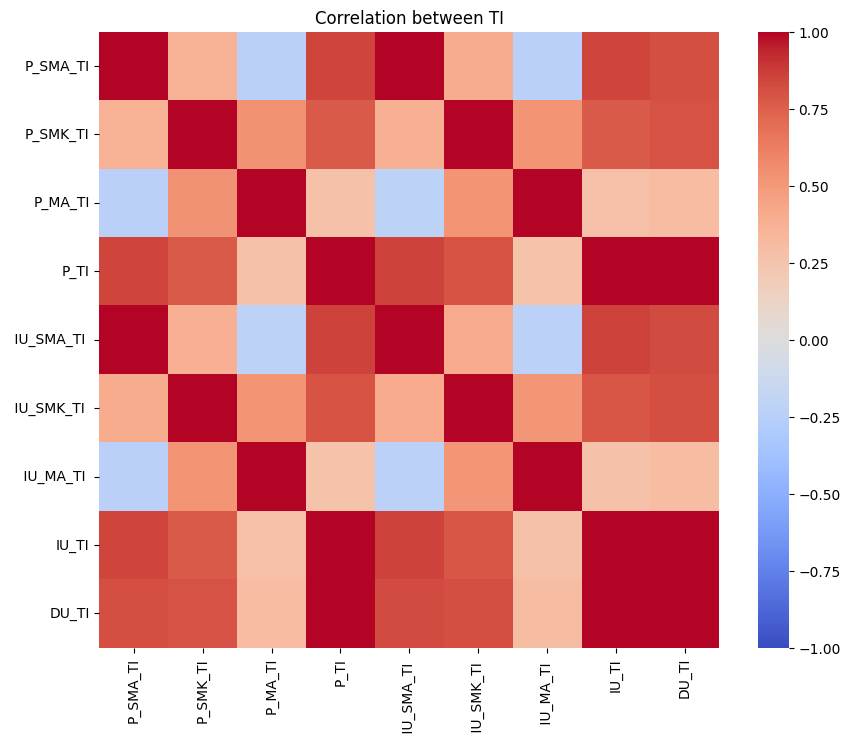

In [16]:
plt.figure(figsize=(10,8))
plt.title('Correlation between TI')
sns.heatmap(df_ti.corr(), cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

### Data Explaination

P = Pendaftar

IU = ikut ujian


R2 Score: 0.9902038019789552
Mean Squared Error: 18.364605890118675
Mean Absolute Error: 4.142903078814565
Columns: Index(['P_TI', 'IU_TI'], dtype='object')
Coefficient: [31.99056682 19.72171539]
Intercept: 240.25
P_TI : 31.990566821031837
IU_TI : 19.72171539202657


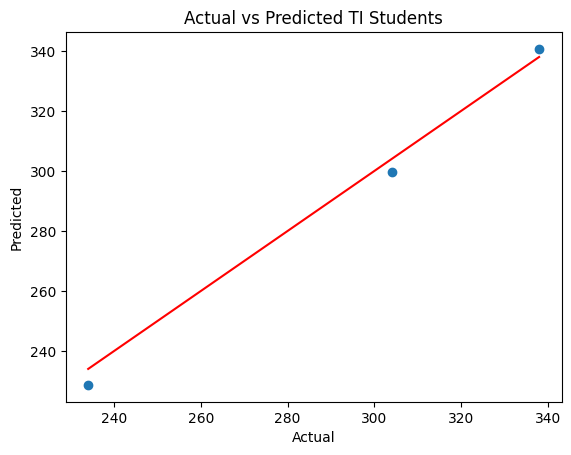

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

scaler = StandardScaler()
X = df_ti[['P_TI','IU_TI']]
y = df_ti['DU_TI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Coefficients
print(f"Columns: {X.columns}")
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
for col in X.columns:
    print(f"{col} : {model.coef_[X.columns.get_loc(col)]}")

plt.plot(y_test, y_pred, 'o')
# line plot linear regression
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted TI Students')
plt.show()

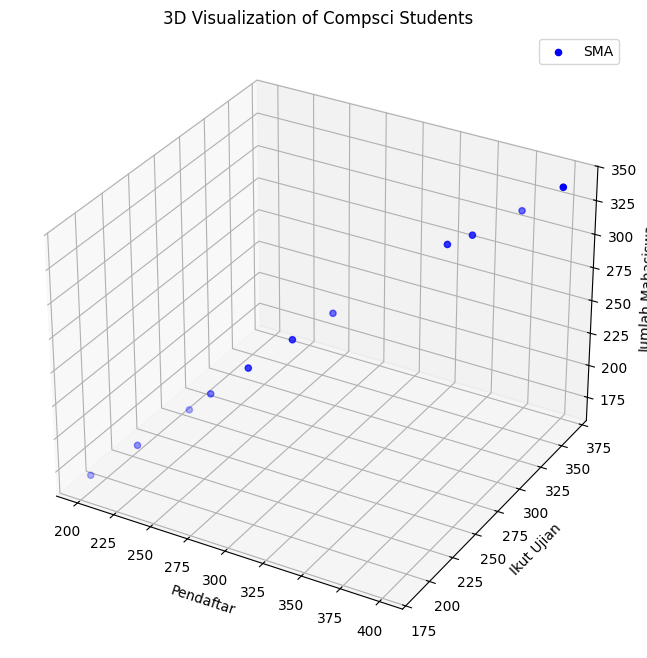

In [27]:
# 3D Visualization 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['P_TI'], X['IU_TI'], y, c='b', marker='o')
ax.set_xlabel('Pendaftar')
ax.set_ylabel('Ikut Ujian')
ax.set_zlabel('Jumlah Mahasiswa')
ax.set_title('3D Visualization of Compsci Students')
plt.legend(['SMA', 'SMK', 'MA'])
plt.show()
